# ASX Index Predictor
## Created by: Ricky Chang
1) Hypothesis - can monthly asset prices / ratios be used as a lagging (buy) indicator for index price?

* Stock index reflects the state of the economy
* Rising non precious metal prices have a correlation with the overall economy
* Rising precious metal prices have an inverse correlation with the overall economy, and precious metal prices


2) Feature engineering - standardisation

Which scaler / transformation to use? It depends on the feature distribution. Chi-square goodness of fit test can indicate whether the chosen transformation is suitable.

3) chi square goodness of fit

4) Feature selection

5) Model selection (logistic regression)

6) fit - k means validation: train validate test split
bagging, bootstrap

7) predict
either 
Logistic binary classifier

y = 1 [buy]

y = 0 [sell/don't buy]

ordered regression classifier (linear?) 

-1 <= y < -0.5 [strong sell]

-0.5 <= y < 0 [weak sell]

y = 0 [neutral]

0 <= y < 0.5 [weak buy]

0.5 <= y < 1 [strong buy]

## feature engineering
non 

## Model
Logistic classifier Long / Short, based on ratio of previous period

https://www.youtube.com/results?search_query=commsec+tv

https://www.marketindex.com.au/data-downloads

## test train split

In [3]:
import pandas as pd
import tensorflow as ts
import seaborn as sns
sns.set()
import sklearn as sk
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
# apply fix to statsmodels library
from scipy import stats
stats.chisquareprob = lambda chisq, df: stats.chi2.sf(chisq,df)

In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\graphviz-2.38\\bin\\'

In [220]:
gold1 = pd.ExcelFile('C:\\Users\\mahle\\Desktop\\Ricky\\github\\mahlibras-snippets\\gold-price-history.xlsx')
silver1 = pd.ExcelFile('C:\\Users\\mahle\\Desktop\\Ricky\\github\\mahlibras-snippets\\silver-price-history.xlsx')
copper1 = pd.ExcelFile('C:\\Users\\mahle\\Desktop\\Ricky\\github\\mahlibras-snippets\\copper-price-history.xlsx')
iron1 = pd.ExcelFile('C:\\Users\\mahle\\Desktop\\Ricky\\github\\mahlibras-snippets\\iron-ore-price-history.xlsx')
oil1 = pd.ExcelFile('C:\\Users\\mahle\\Desktop\\Ricky\\github\\mahlibras-snippets\\oil-price-history.xlsx')
xao1 = pd.ExcelFile('C:\\Users\\mahle\\Desktop\\Ricky\\github\\mahlibras-snippets\\All Ordinaries (XAO).xlsx')
xtl1 = pd.ExcelFile('C:\\Users\\mahle\\Desktop\\Ricky\\github\\mahlibras-snippets\\ASX 20 (XTL).xlsx')
xfl1 = pd.ExcelFile('C:\\Users\\mahle\\Desktop\\Ricky\\github\\mahlibras-snippets\\ASX 50 (XFL).xlsx')
df_gold = gold1.parse('Gold History')[10:]
df_silver = silver1.parse('Silver History')[10:]
df_iron = iron1.parse('Iron Ore History')[10:]
df_copper = copper1.parse('Copper History')[10:]
df_oil = oil1.parse('Crude Oil History')[10:]
df_xao = xao1.parse('All Ordinaries (XAO)')[4:]
df_xtl = xtl1.parse('ASX 20 (XTL).csv')[4:]
df_xfl = xfl1.parse('ASX 50 (XFL).csv')[4:]
df_gold.rename(columns={'Market Index':'Date','Unnamed: 1':'Gold'}, inplace=True)
df_gold.drop(columns=['Unnamed: 2','Unnamed: 3'], inplace=True)
df_silver.rename(columns={'Market Index':'Date','Unnamed: 1':'Silver'}, inplace=True)
df_copper.rename(columns={'Market Index':'Date','Unnamed: 1':'Copper'}, inplace=True)
df_iron.rename(columns={'Market Index':'Date','Unnamed: 1':'Iron'}, inplace=True)
df_oil.rename(columns={'Market Index':'Date','Unnamed: 1':'WTI','Unnamed: 2':'Brent'}, inplace=True)
df_xao.drop(columns=['Unnamed: 6','Unnamed: 7','Unnamed: 8'], inplace=True)
df_xtl = df_xtl.drop(columns=['Unnamed: 6','Unnamed: 7','Unnamed: 8'])
df_xfl = df_xfl.drop(columns=['Unnamed: 6','Unnamed: 7','Unnamed: 8'])
df_xao = df_xao.rename(columns=df_xao.head(1).to_dict('records')[0])[2:]
df_xtl = df_xtl.rename(columns=df_xtl.head(1).to_dict('records')[0])[2:]
df_xfl = df_xfl.rename(columns=df_xfl.head(1).to_dict('records')[0])[2:]
df_gold.set_index('Date', inplace=True)
df_silver.set_index('Date', inplace=True)
df_copper.set_index('Date', inplace=True)
df_iron.set_index('Date', inplace=True)
df_oil.set_index('Date', inplace=True)
df_xao.set_index('Date', inplace=True)
df_xtl.set_index('Date', inplace=True)
df_xfl.set_index('Date', inplace=True)
df_asset = df_gold.join(df_silver).join(df_iron).join(df_copper).join(df_oil).dropna()

In [ ]:
g = sns.PairGrid(df_asset)
g.map(plt.scatter)

In [ ]:
x1 = df_asset.reset_index(drop=True)['Brent']
y = df_asset.reset_index(drop=True)['Copper']
x = sm.add_constant(x1)
res_asset = sm.OLS(y.astype(float),x.astype(float)).fit()
plt.scatter(x1,y)
yhat = 70.9909*x1 + 605.5867
fig = plt.plot(x1,yhat,lw=4, c='orange', label='regression line')
plt.xlabel('Brent', fontsize=20)
plt.ylabel('Copper', fontsize=20)
plt.show()
res_asset.summary()

In [ ]:
num_bins = 5
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(y-yhat, num_bins, density=1)
fig.tight_layout()
plt.show()

In [ ]:
y1 = y-yhat.values
y1 = y1.to_numpy().astype(float)

sns.distplot(y1, color="m")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
y1.sort()
data=y1.reshape(1,-1)
#data_scaled = StandardScaler()
#data_scaled.fit(data)
#data_scaled.transform(data)
norm=np.random.normal(0,2,len(data))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,data,"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,data, 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Experimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
gold_qt = QuantileTransformer()
gold_qt.fit_transform(gold)

#X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
X = np.log(gold.tolist())
#X = gold.tolist()
sns.distplot(X, color="m")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [ ]:
#gold_scaled = PowerTransformer(method='box-cox')
#gold_scaled = PowerTransformer(method='yeo-johnson')
#gold_scaled = QuantileTransformer(output_distribution='normal')
df_asset['Gold_scaled'] = gold_scaled.fit_transform(df_asset['Copper'].values.reshape(-1,1))
df_asset['X_lognormal'] = rng.lognormal(size=len(df_asset))
df_asset['X_lognormal_transform'] = gold_scaled.fit_transform(df_asset['X_lognormal'].values.reshape(-1,1))
df_asset['X_lognormal_transform'].plot.hist()

# Feature Engineering - Date Conversion
Asset prices/price ratios are used as predictors for index prices, which are reported at the end of the month

Example:
Asset Date: 2019-05-01, which is the May 19 price
Index Date: 2019-05-31, which is the May 19 price

For the same month, Index date must be converted to 2019-05-01 for DataFrame index joins.

Since hypothesis is to use asset price to predict future index prices, the month component must be offset.

Example:

Asset April 19 price is used to predict Index May 19 price. We want to orient DataFrame rows with respect to the target (Index price).

Hence an 'Index_Date' (Index as in DataFrame Index, not the Index-related features!!!) can be created by applying tranformations:

get_first_day_of_next_month(Asset Date)

get_first_day_of_current_month(Index Date)

In [218]:
import datetime as dt
def get_first_day_of_next_month(x):
    m = x.month
    y = x.year
    if m == 12:
        m = 1
        y += 1
    else:
        m = m + 1
    return dt.datetime(y,m,1)
def get_first_day_of_current_month(x):
    m = x.month
    y = x.year
    return dt.datetime(y,m,1)

In [223]:
df_indices = df_xao.join(df_xtl, rsuffix='_XTL').join(df_xfl, rsuffix='_XFL').dropna()
df_indices = df_indices.reset_index()
df_indices['Date_End'] = df_indices['Date']
list_datetimes = []
for i in range(df_indices['Date'].shape[0]):
    list_datetimes.append(get_first_day_of_next_month(pd.to_datetime(df_indices['Date'].values[i])))
df_indices['Date'] = list_datetimes
df_indices = df_indices.set_index('Date')
df_asset = df_asset.join(df_indices.iloc[:,:5]).dropna()

ValueError: columns overlap but no suffix specified: Index(['Open', 'High', 'Low', 'Close', 'Return (%)'], dtype='object')

In [229]:
from sklearn.preprocessing import StandardScaler
unscaled_inputs = df_asset.iloc[:,:-5]
copper_gold_ratio = unscaled_inputs['Copper'] / unscaled_inputs['Gold']
unscaled_inputs['CopperGoldRatio'] = copper_gold_ratio 
asset_scaler = StandardScaler()
asset_scaler.fit(unscaled_inputs)
scaled_inputs = asset_scaler.transform(unscaled_inputs)

C:\Users\mahle\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mahle\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  import sys


In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
reg = LogisticRegression()
reg.fit(scaled_inputs,df_asset.iloc[:,-1:] > 0)

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [232]:
feature_name = unscaled_inputs.columns.values
summary_table = pd.DataFrame(columns=['Feature Name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['Odds_Ratio'] = np.exp(summary_table.Coefficient)
summary_table = summary_table.sort_values('Odds_Ratio', ascending = False)
summary_table

,Feature Name,Coefficient,Odds_Ratio
0,Intercept,0.374824,1.454735
4,Copper,0.276937,1.319083
6,Brent,0.208400,1.231705
2,Silver,0.152804,1.165096
7,CopperGoldRatio,-0.045495,0.955524
5,WTI,-0.143734,0.866118
3,Iron,-0.236371,0.789488
1,Gold,-0.252507,0.776851


# Feature Significance
Odds Ratio close to 1 indicates that the feature does not contribute significantly to the model, and could be removed from the model.

C:\Users\mahle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


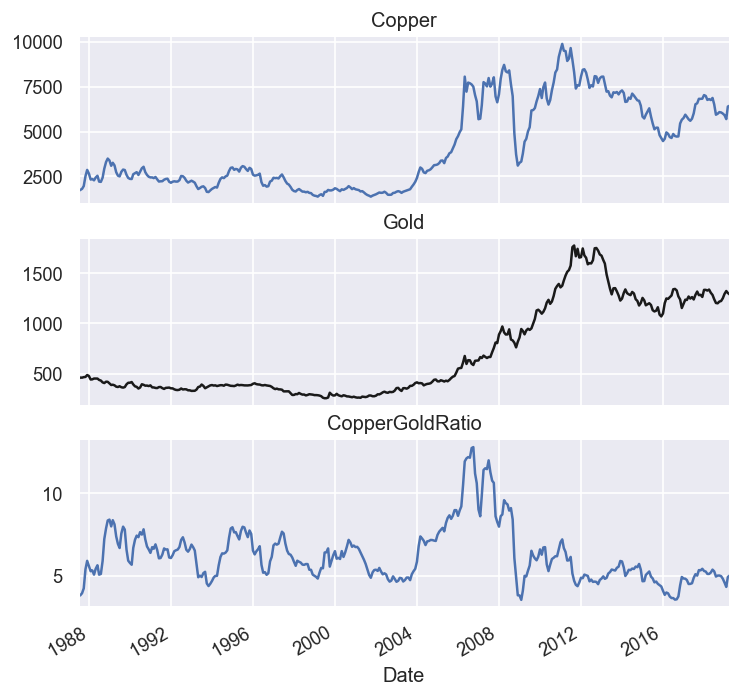

In [205]:
fig, axes = plt.subplots(3,1, figsize=(7, 7), sharex=True, dpi=120)
unscaled_inputs['Copper'].plot(ax=axes[0], title='Copper')
unscaled_inputs['Gold'].plot(ax=axes[1], color='k', title='Gold')
unscaled_inputs['CopperGoldRatio'].plot(ax=axes[2], title='CopperGoldRatio')


In [233]:
reg.score(scaled_inputs,df_asset.iloc[:,-1:] > 0)

0.5931758530183727

(381, 7)